A sequence of n X gates is applied, as n grows the circuit is measured

In [54]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime.fake_provider import FakeManilaV2
from qiskit_ibm_runtime import SamplerV2
from qiskit_aer import AerSimulator
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
import matplotlib.pyplot as plt
from time import time

In [48]:
def getCircuitCounts(qc: QuantumCircuit, noisy=True, shots = 1024):
    backend = FakeManilaV2() if noisy else AerSimulator()

    # You can use a fixed seed to get fixed results.
    result = SamplerV2(backend).run([
        generate_preset_pass_manager(backend=backend, optimization_level=0)
            .run(qc)
    ], shots=shots).result()

    retDict = result[0].data.out.get_counts()

    return { k:retDict[k] for k in sorted(retDict) }

In [49]:
def getQC_n(nX = 0):
    qReg = QuantumRegister(1, 'Qubit')
    cReg = ClassicalRegister(1, 'out')
    qc = QuantumCircuit(qReg, cReg)
    
    for i in range(nX):
        qc.x(qReg)

    qc.measure(qReg, cReg)
    return qc

In [50]:
data = {}
shots = 1024

for n in range(1000):
    startTime = time()
    counts = getCircuitCounts(getQC_n(n), shots=shots)
    correctCounts = counts[f'{n%2}']
    data[n] = correctCounts/shots
    # print(f'{time() - startTime}')
    # print(counts)
    # print(correctCounts)

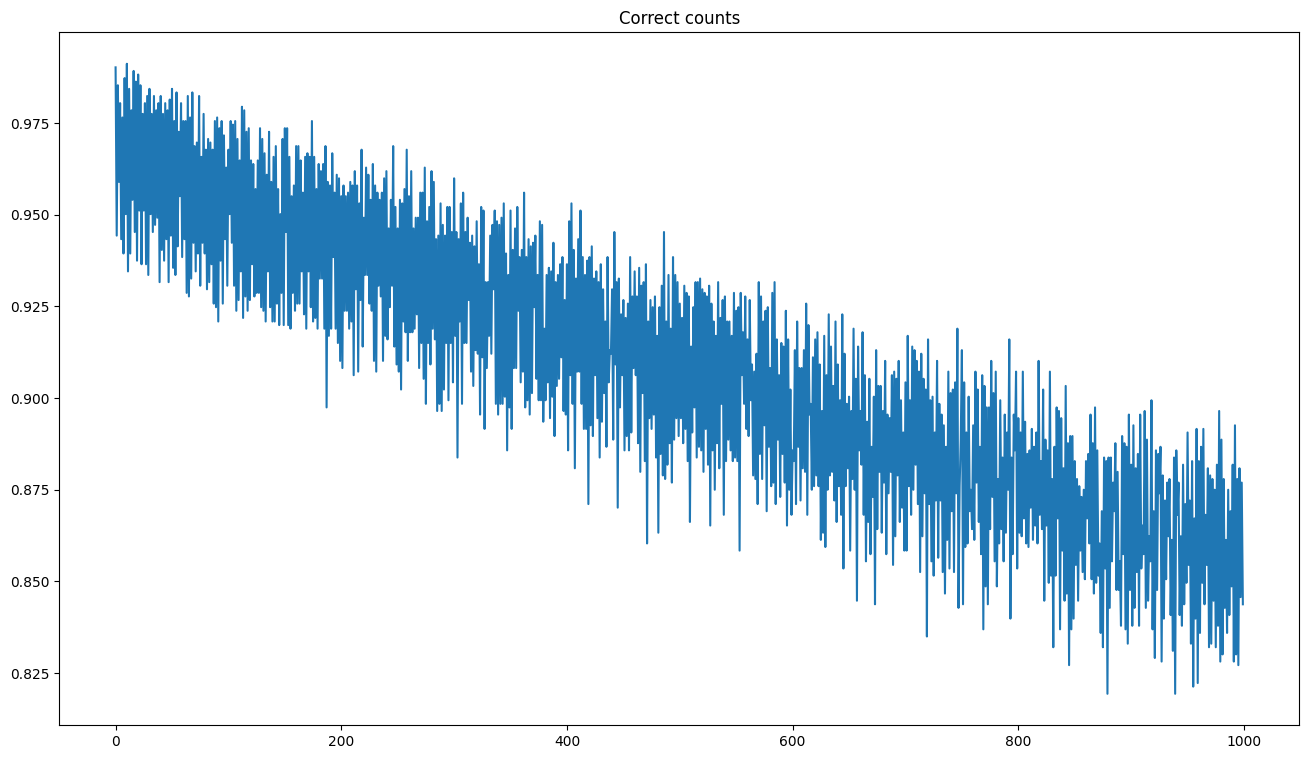

In [51]:
plt.figure(figsize=(16, 9))
plt.title('Correct counts')
plt.plot(data.values())
plt.show()

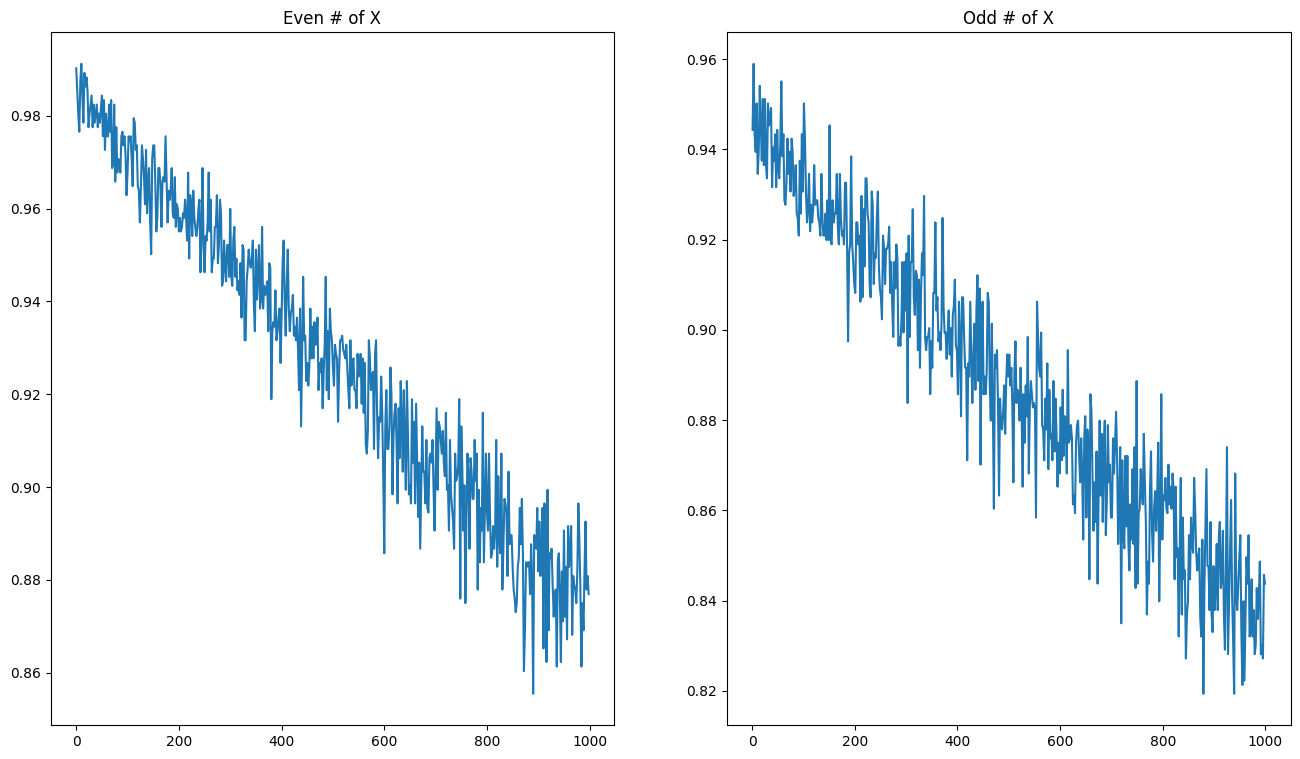

In [52]:
# Try to see any asymmetry due to the number of X gates (split even and odd)
v = list(data.values())
plt.figure(figsize=(16, 9))
plt.subplot(1, 2, 1)
plt.gca().title.set_text('Even # of X')
plt.plot( [i for i in range(0, len(v), 2)], [ v[i] for i in range(0, len(v), 2)  ] )
plt.subplot(1, 2, 2)
plt.gca().title.set_text('Odd # of X')
plt.plot( [i for i in range(1, len(v), 2)], [ v[i] for i in range(1, len(v), 2)  ] )
plt.show()

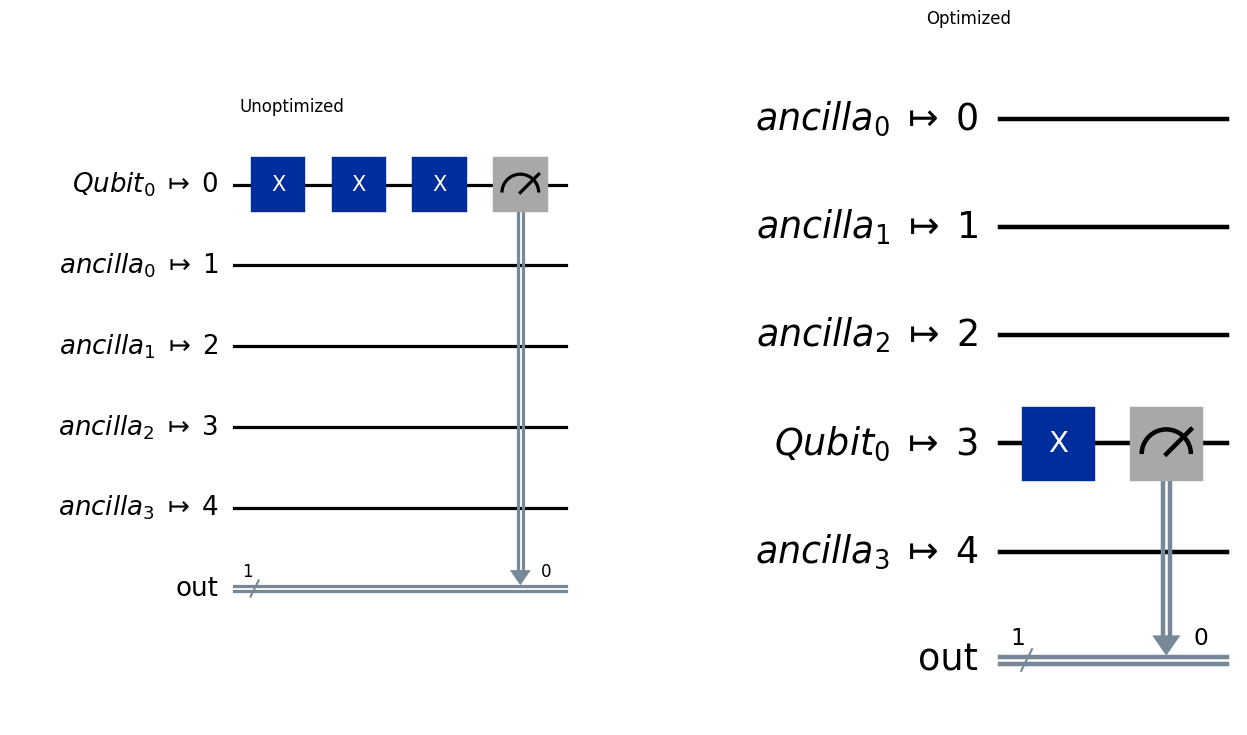

In [53]:
# Test if some kind of black box optimization are performed by drawing the transpiled circuit like inverse cancellation -> XX = I
plt.figure(figsize=(16, 9))

nX = 3

plt.subplot(1, 2, 1)
plt.gca().title.set_text("Unoptimized")
generate_preset_pass_manager(backend=FakeManilaV2(), optimization_level=0).run(getQC_n(nX)).draw('mpl', ax=plt.gca())

plt.subplot(1, 2, 2)
plt.gca().title.set_text("Optimized")
generate_preset_pass_manager(backend=FakeManilaV2(), optimization_level=3).run(getQC_n(nX)).draw('mpl', ax=plt.gca())